# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
X_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_train_normalized.csv", index_col=[0])
X_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_test_normalized.csv", index_col=[0])
y_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_train.csv", index_col=[0])
y_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_test.csv", index_col=[0]).reset_index(drop=True)

In [3]:
X_train.head(5)

,Symbol,Volume,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,...,Adj Close 14-Day std Differenced,Adj Close 26-Day std Differenced,Adj Close 7-Day Upper Bollinger Band Differenced,Distance to Adj Close 7-Day Upper Bollinger Band Differenced,True Range Differenced,True Range 26-Day SMA Differenced,Adj Close Differenced,High Differenced,Low Differenced,Open Differenced
0,-1.439324,-0.326871,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,0.041515,0.037984,-0.002604,-0.016884,-0.066039,0.104504,-0.020330,0.008943,0.015877,0.062622
1,-1.069061,-0.344648,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,2.582087,-0.412467,...,-0.410893,-0.015098,0.023690,-0.111938,-0.141182,-0.090630,-0.107768,0.032258,0.030478,0.096788
2,1.641263,-0.295005,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,0.081853,0.002250,0.188618,0.000862,-0.002066,0.105746,0.125379,0.102205,0.158246,0.137784
3,-0.343346,0.285874,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,2.582087,-0.412467,...,0.162828,-0.007191,0.102354,0.062595,0.043600,0.091515,0.136523,0.094434,0.004925,0.076288
4,1.256190,-0.328472,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,2.534516,-0.387284,-0.412467,...,1.195841,-0.202535,1.265493,-0.284640,-0.679202,-1.099516,0.521058,0.755054,0.866425,0.817676


In [4]:
X_test.head(5)

,Symbol,Volume,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,...,Adj Close 14-Day std Differenced,Adj Close 26-Day std Differenced,Adj Close 7-Day Upper Bollinger Band Differenced,Distance to Adj Close 7-Day Upper Bollinger Band Differenced,True Range Differenced,True Range 26-Day SMA Differenced,Adj Close Differenced,High Differenced,Low Differenced,Open Differenced
0,-1.054250,-0.283809,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,2.424439,...,0.244619,-0.054833,0.193442,-0.988178,-0.460024,-0.458573,-0.961706,-0.123181,-0.779922,0.216366
1,0.449017,-0.359859,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,2.534516,-0.387284,-0.412467,...,-1.623606,-1.598235,-0.116220,-0.549677,-0.673831,-0.614296,-0.682605,0.832754,-0.079040,1.432648
2,1.419105,-0.198809,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,-4.366291,-2.195166,0.093043,-4.112427,3.947181,1.902798,-4.471950,1.435083,-4.328154,1.015831
3,-1.261598,-0.272044,-0.21136,-0.21136,-0.356345,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,5.267571,4.461425,4.610485,-12.390394,14.154228,10.022441,-10.617055,-3.111471,-14.261016,-12.872375
4,-0.128593,-0.255868,-0.21136,-0.21136,2.806268,-0.279992,-0.222173,-0.394553,-0.387284,-0.412467,...,0.039264,0.059860,0.030323,-0.411204,0.082851,0.121352,-0.433286,-0.263072,-0.294412,0.025041


In [5]:
y_train.head(5)

,1-week Forward Return Sign
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [6]:
y_test.head(5)

,1-week Forward Return Sign
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# Fit Logistic Regression Model

### Check class imbalance

<Axes: title={'center': 'Frequency of each class in the training and test targets'}>

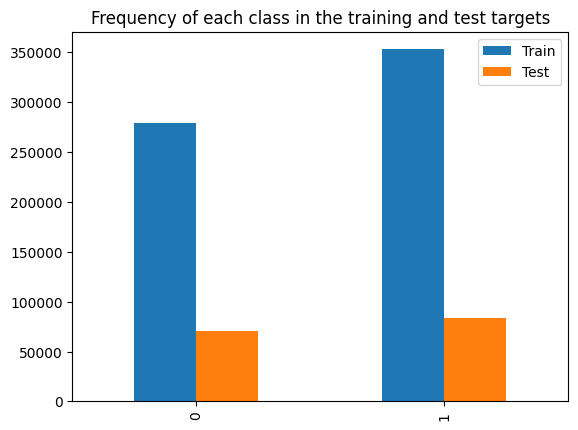

In [7]:
# Examine class imbalance in training and test sets
train_classes = y_train.value_counts().sort_index()
test_classes = y_test.value_counts().sort_index()
class_freq = pd.DataFrame(data=zip(train_classes, test_classes), columns=['Train', 'Test'], index=[0, 1])
class_freq.plot(kind='bar', title='Frequency of each class in the training and test targets')

### Parameter Optimization

In [8]:
# Imports
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create base model
lr = LogisticRegression()

# Create time series split object to allow for CV without look-ahead bias
tscv = TimeSeriesSplit(n_splits=4)

In [9]:
# Create random search object
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=grid,
    n_iter=12,
    cv=tscv,
    n_jobs=-1,
    scoring='accuracy',
    verbose=3,
    refit=False
)

# Fit the grid search to data
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=12. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
                   estimator=LogisticRegression(), n_iter=12, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   refit=False, scoring='accuracy', verbose=3)

In [10]:
# Get results of all trained models
cv_results = random_search.cv_results_
print(cv_results)

# Get best params and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best params are {best_params}")
print(f"Best accuracy score is {best_score}")

# Save best parameters
import pickle
with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

{'mean_fit_time': array([ 12.90700006,  39.07939386, 109.29665393,  41.74357647,
       148.02798957,  49.48800534]), 'std_fit_time': array([ 7.57549454, 15.73503541, 35.55282786, 11.82778137, 55.03290046,
        9.61544057]), 'mean_score_time': array([0.08249098, 0.07798523, 0.06885606, 0.07151026, 0.06447333,
       0.07395738]), 'std_score_time': array([0.02280576, 0.0040656 , 0.00179385, 0.00265609, 0.00819888,
       0.02620054]), 'param_solver': masked_array(data=['liblinear', 'liblinear', 'liblinear', 'liblinear',
                   'liblinear', 'liblinear'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1],
             mask=[False, False, False, False, False, False],


### Train model

In [11]:
# Fit model with best params
lr = LogisticRegression(**best_params)
lr.fit(X_train, y_train)
lr.coef_

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2.47131747e-03,  4.84244843e-03, -2.89257848e-02,
        -1.86137929e-02, -1.96898159e-02, -1.43140026e-02,
        -5.23736029e-02, -7.95685096e-03, -1.19331033e-02,
        -1.31109448e-02, -1.08782965e-02,  2.13853694e-03,
        -4.36711539e-02, -1.80038550e-04,  3.41751961e-02,
         5.20768002e-02, -4.07131686e-02,  1.52402990e-02,
         1.40183395e-02,  8.81114480e-03,  1.79593231e-02,
         4.78911605e-04, -8.62115065e-04, -1.15665599e-02,
        -2.78937415e-02, -8.31331092e-03, -2.56629443e-02,
        -1.41575833e-02,  2.10635145e-02, -2.88890838e-02,
         1.25620728e-03,  2.55035133e-02, -2.52209279e-02,
         8.64073833e-03, -9.30653723e-03, -5.68278634e-02,
        -1.14916143e-01, -5.56178490e-03, -1.12249494e-02,
         5.15651895e-02, -9.03082758e-03, -5.10334667e-02,
        -4.86917095e-02,  2.24920867e-02,  3.52354696e-02,
         2.32153100e-01, -1.81077776e-02, -9.40185163e-02,
        -4.72633334e-03, -8.42462277e-02, -1.56892805e-0

In [12]:
# Save model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr, f)